In [68]:
#Module 1:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import torch
from torch.utils.data import TensorDataset, DataLoader

from google.colab import drive
drive.mount('/content/drive')

import sys
import os
sys_path = '/content/drive/My Drive/Colab Notebooks/'


os_path = os.path.join(sys_path, 'aadr.us.txt')
data = pd.read_csv(os_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
# Module 2:

def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

    train_data = TensorDataset(X_train_tensor, y_train_tensor)
    test_data = TensorDataset(X_test_tensor, y_test_tensor)
    train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=64)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    return model, test_loader, y_test_tensor


In [70]:
# Module 3:

def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    return rmse

In [71]:
#Module 4:

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

In [72]:
#Module 5:

import matplotlib.pyplot as plt

def plot_comparison(y_true, y_pred):

    plt.figure(figsize=(12, 6))
    plt.plot(y_true, label='Actual', color='blue')
    plt.plot(y_pred, label='Predicted', color='orange', linestyle='--')
    plt.title('Actual vs Predicted Stock Prices')
    plt.xlabel('Data Points')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

In [73]:
# Module 6:

def evaluate_model(model, X_test, y_test):
    y_pred = []
    for inputs, labels in test_loader:
        outputs = model.predict(inputs.numpy())
        y_pred.extend(outputs.flatten())
    y_pred = np.array(y_pred)

    rmse = root_mean_squared_error(y_test_tensor.numpy(), y_pred)
    mape = mean_absolute_percentage_error(y_test_tensor.numpy(), y_pred)
    print("Root Mean Squared Error:", rmse)
    print("Mean Absolute Percentage Error:", mape)

    plot_comparison(y_test_tensor.numpy(), y_pred)

    return y_pred

def make_predictions(model, new_data):

    predictions = model.predict(new_data)
    return predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Root Mean Squared Error: 0.13540357307584164
Mean Absolute Percentage Error: 21.45368558645058


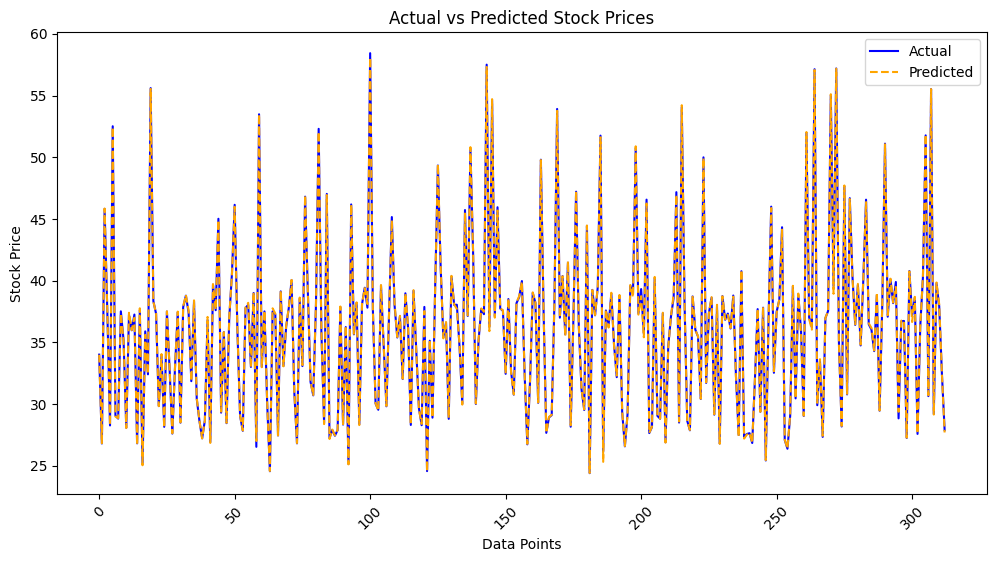

array([33.99142769, 26.8288637 , 45.83935673, 37.61783965, 28.29595003,
       52.43831335, 28.99539532, 28.85978557, 37.34201524, 35.14429264,
       28.05955546, 37.39753185, 35.9983277 , 36.99273766, 26.69581498,
       37.7603563 , 25.04261055, 35.61007295, 32.44474963, 55.53355469,
       38.28771013, 37.36023334, 29.82860522, 34.04938599, 28.11271844,
       37.51755495, 32.84712297, 27.63449924, 33.08290265, 37.49054269,
       28.51938375, 37.91061351, 38.83538001, 37.57734507, 31.88881179,
       38.40357707, 30.4776768 , 28.66664517, 27.22364931, 28.67802704,
       37.06052731, 26.8510549 , 39.72354875, 37.65266621, 44.90189287,
       29.38922923, 35.82874504, 28.47988075, 37.10302649, 40.46606255,
       45.97951918, 36.11672529, 29.07135764, 27.85897468, 37.83897136,
       38.20427939, 32.99056973, 39.04855732, 27.00649997, 53.47300206,
       32.98377814, 37.55364669, 30.11339793, 24.574994  , 37.7589512 ,
       37.33600019, 27.45842118, 39.19168199, 33.05775924, 36.32

In [74]:
#Module 7

features = ['Open', 'High', 'Low', 'Volume', 'OpenInt']
X = data[features]
y = data['Close']

model, test_loader, y_test_tensor = train_model(X, y)

evaluate_model(model, test_loader, y_test_tensor)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

Root Mean Squared Error: 0.34015905102804667
Mean Absolute Percentage Error: 20.41414150656396


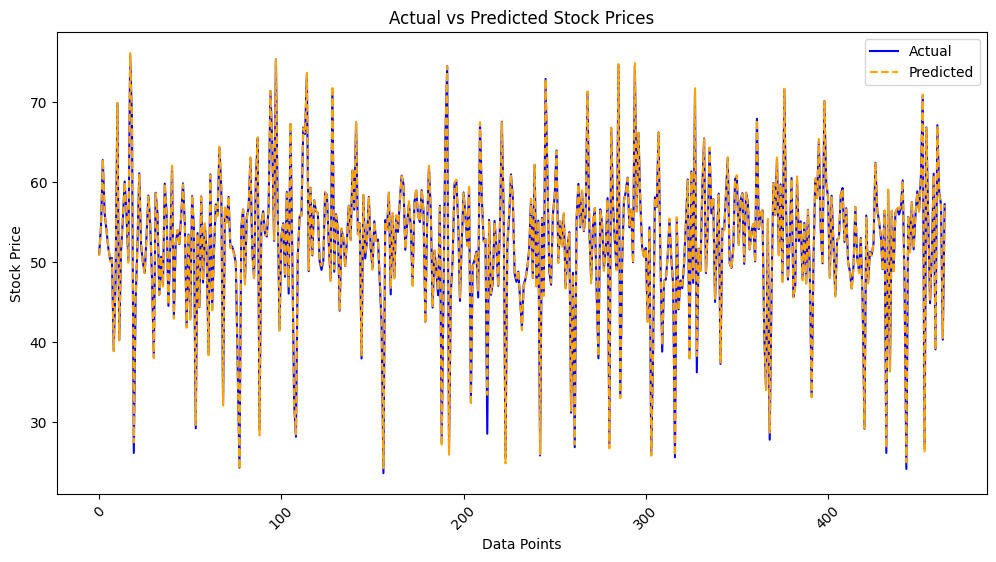

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Root Mean Squared Error: 0.3774416557427049
Mean Absolute Percentage Error: 14.559106703310636


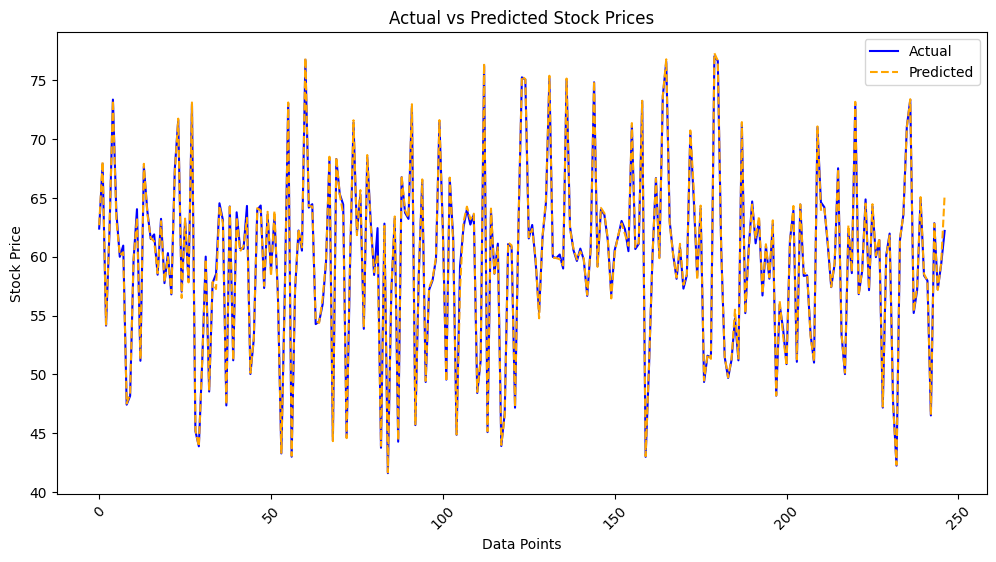

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Root Mean Squared Error: 0.019125895877900465
Mean Absolute Percentage Error: 8.854963241211289


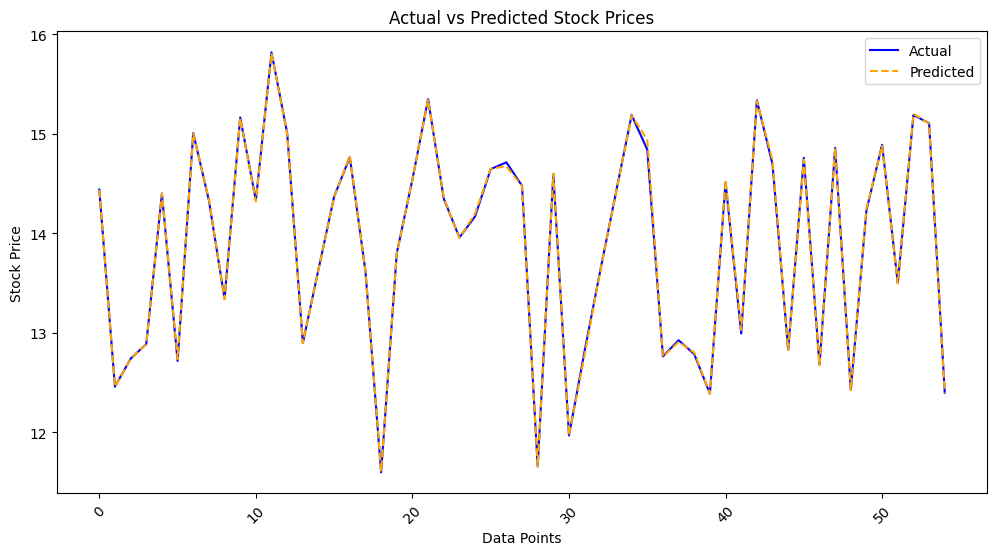

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Root Mean Squared Error: 0.2072173505220565
Mean Absolute Percentage Error: 12.04952794620805


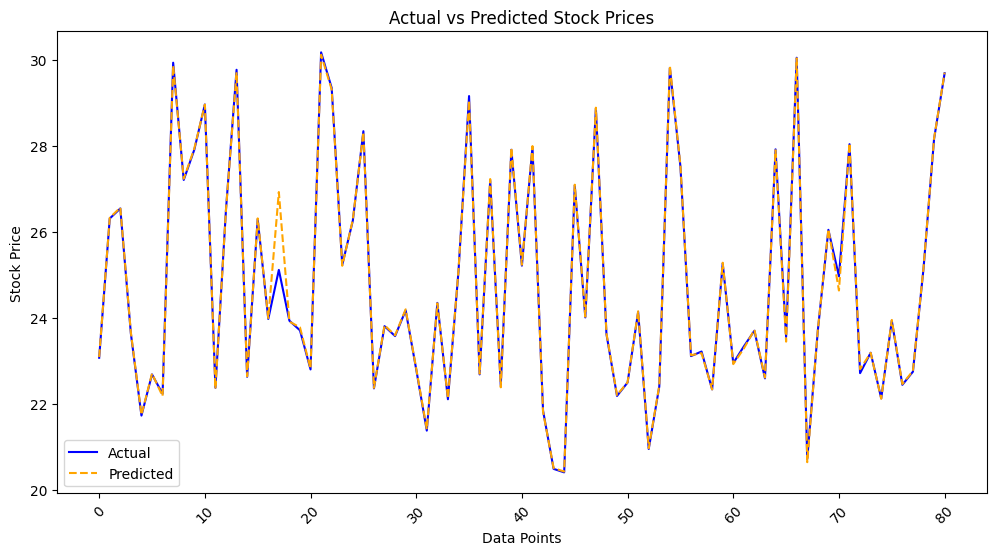

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

Root Mean Squared Error: 0.05144596865024255
Mean Absolute Percentage Error: 18.432226435636416


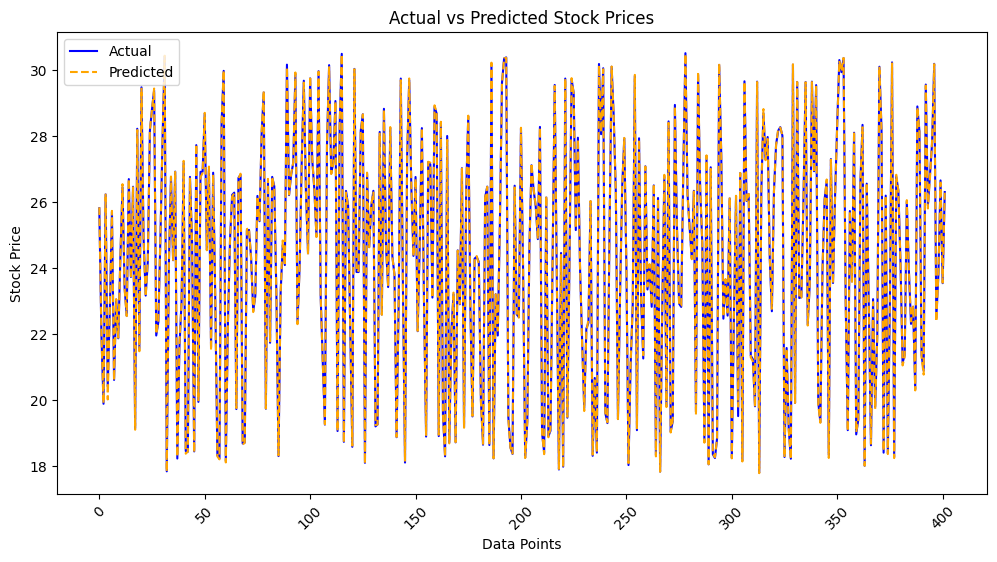

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

Root Mean Squared Error: 0.29244425102674165
Mean Absolute Percentage Error: 30.695834274680163


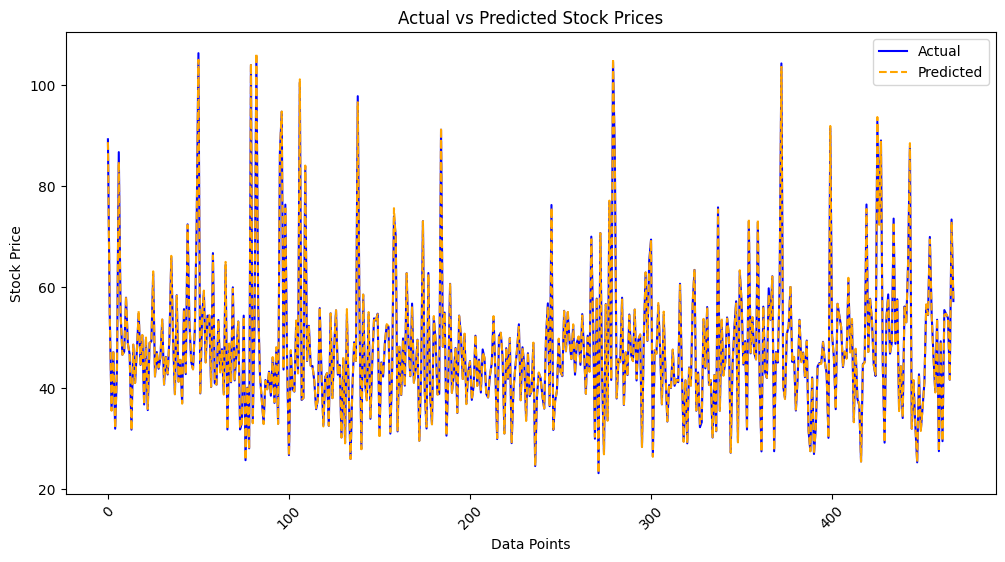

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

Root Mean Squared Error: 0.48910831720130016
Mean Absolute Percentage Error: 89.11964548958377


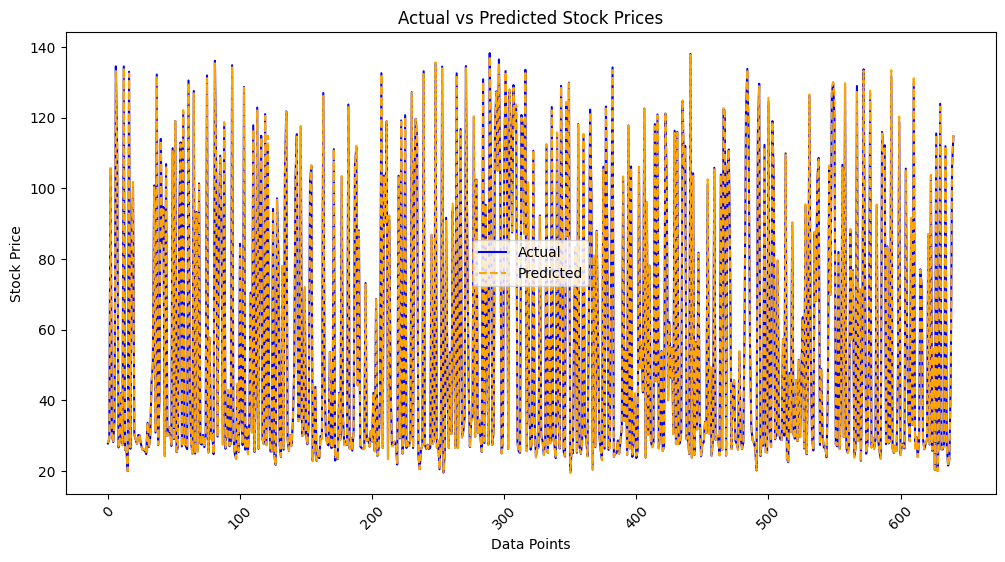

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Root Mean Squared Error: 0.22249422969882257
Mean Absolute Percentage Error: 16.385455910778425


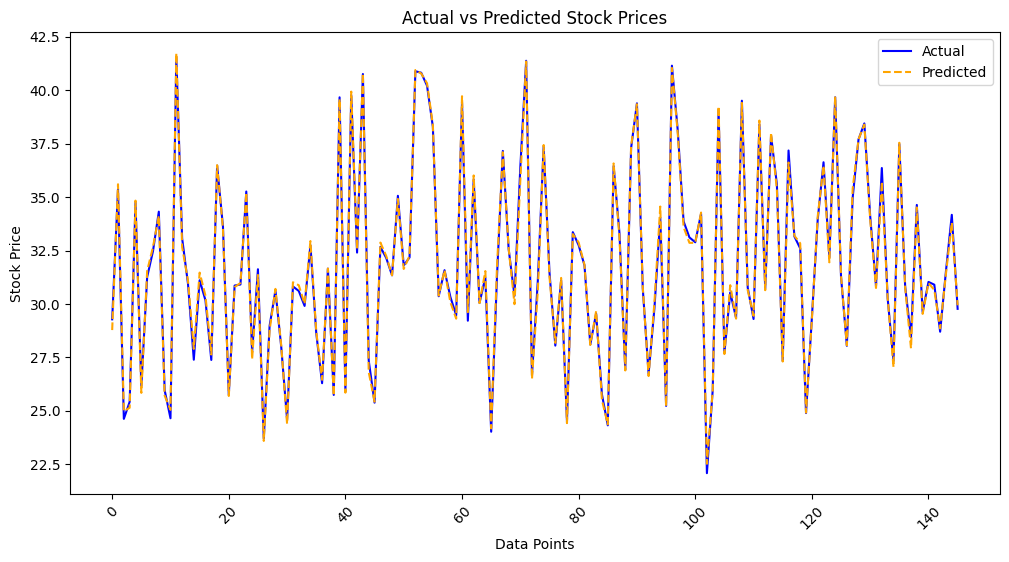

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Root Mean Squared Error: 0.05994917620032111
Mean Absolute Percentage Error: 12.847548509579928


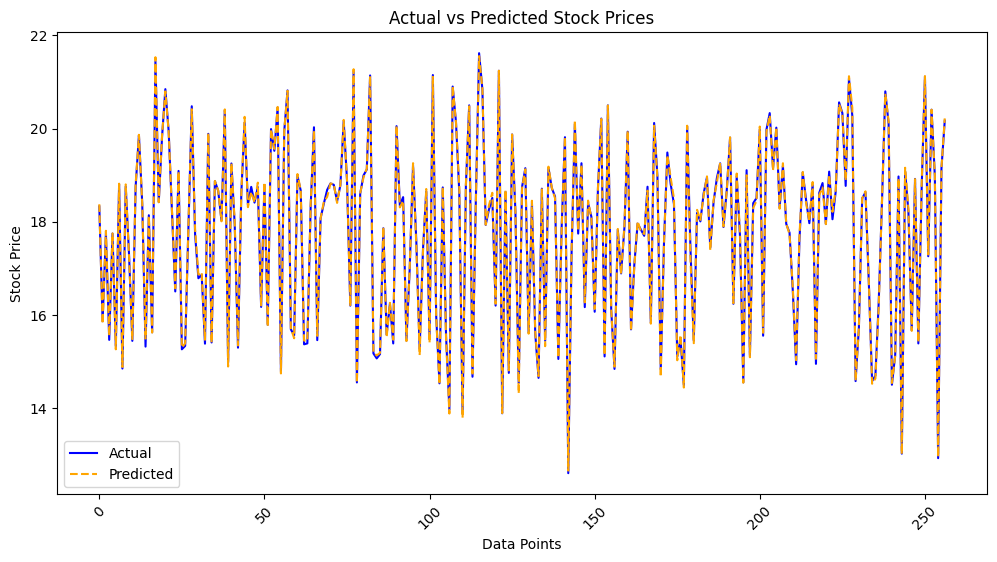

In [76]:
#Module 8:

#Run 9 other datasets

files = ['aaxj.us.txt', 'acim.us.txt', 'actx.us.txt', 'acwf.us.txt', 'bab.us.txt', 'bal.us.txt', 'bbh.us.txt', 'bbp.us.txt', 'bbrc.us.txt']

for filename in files:
    sys_path = '/content/drive/My Drive/Colab Notebooks/'
    file_path = os.path.join(sys_path, filename)
    new_data = pd.read_csv(file_path)

    features = ['Open', 'High', 'Low', 'Volume', 'OpenInt']
    X = new_data[features]
    y = new_data['Close']

    model, test_loader, y_test_tensor = train_model(X, y)

    evaluate_model(model, test_loader, y_test_tensor)

